In [16]:
import pandas as pd 
import sklearn as skl 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
def split_target(data, target):
    data = data.copy()

    y = data[target].ravel()

    X = data.copy()
    X = X.drop(columns=target, axis=1)

    return X, y

In [5]:
X, y = split_target(data=diabetes_df, target='Outcome')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
def scale_X(X_train, X_test):
    scl = StandardScaler()
    X_scl = scl.fit(X_train)

    X_train_scaled = X_scl.transform(X_train)
    X_test_scaled = X_scl.transform(X_test)

    return X_train_scaled, X_test_scaled

In [8]:
X_train, X_test = scale_X(X_train, X_test)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)   

In [24]:
def measure_accuracy(model, y_test, y_pred):
    predict_df = pd.DataFrame({
        'actual':y_pred,
        'prediction':y_test
    })

    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted 0','Predicted 1'], index=['Actual 0','Actual 1'])

    crib = classification_report_imbalanced(y_test, y_pred)
    
    print(f'{model} Results')
    print(f'Accuracy Score: {accuracy}')
    print(confusion_matrix_)
    print(classification_report)

    return predict_df, accuracy, cm_df, crib

In [28]:
predictions, accuracy, confusion_matrix_, classification_report = measure_accuracy(model='Logistic Regression Model', y_test=y_test, y_pred=y_pred)

Logistic Regression Model Results
Accuracy Score: 0.7760416666666666
          Predicted 0  Predicted 1
Actual 0          113           12
Actual 1           31           36
                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.90      0.54      0.84      0.70      0.50       125
          1       0.75      0.54      0.90      0.63      0.70      0.47        67

avg / total       0.77      0.78      0.67      0.77      0.70      0.49       192



In [29]:
predictions.head()

,actual,prediction
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [31]:
def make_1h_nn_model(data, neurons):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=neurons, input_dim=input_features, activation='relu'))

    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()
    return model
    

In [32]:
nn_1h_model = make_1h_nn_model(X_train, neurons=12)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [33]:
def make_2h_nn_model(data, neurons_1, neurons_2):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=neurons_1, input_dim=input_features, activation='relu'))
    model.add(tf.keras.layers.Dense(units=neurons_2, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()

    return model

In [34]:
nn_2h_model = make_2h_nn_model(X_train, neurons_1=12, neurons_2=8)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [35]:
nn_1h_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_model = nn_1h_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 1ms/step - loss: 0.7946 - accuracy: 0.4132
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7470 - accuracy: 0.4618
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.5365
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6042
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6667
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6875
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7066
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7188
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.7361
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7431
Epoch 11/

In [36]:
def get_loss_accuracy(model):

    index_range = range(1,len(model.history['loss'])+1)

    la_df = pd.DataFrame(model.history, index=index_range)

    plt.subplots()
    plt.plot(la_df, label=['loss','accuracy'])
    plt.legend()
    plt.title(f'loss/accuracy over {len(index_range)} epochs')

    return la_df

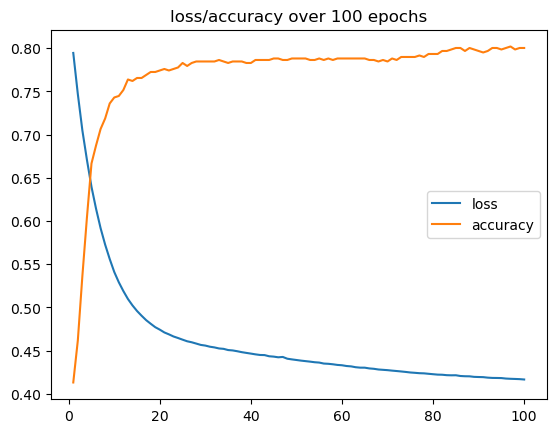

In [37]:
accuracy_df = get_loss_accuracy(fit_model)

In [38]:
model_loss, model_accuracy = nn_1h_model.evaluate(X_test, y_test)
print(f'Loss: {model_loss} | Accuracy: {model_accuracy}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7344
Loss: 0.5559502243995667 | Accuracy: 0.734375


In [39]:
nn_pred = (nn_1h_model.predict(X_test) > 0.5).astype('int')
nn_y_pred = nn_pred.ravel()

6/6 [==============================] - 0s 1ms/step


In [41]:
nn_predictions, nn_accuracy, nn_confusion_matrix_, nn_classification_report = measure_accuracy(model='Neural Network 1H Model', y_test=y_test, y_pred=nn_y_pred)

Neural Network 1H Model Results
Accuracy Score: 0.734375
          Predicted 0  Predicted 1
Actual 0          113           12
Actual 1           31           36
                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.90      0.54      0.84      0.70      0.50       125
          1       0.75      0.54      0.90      0.63      0.70      0.47        67

avg / total       0.77      0.78      0.67      0.77      0.70      0.49       192

